In [1]:
import psutil

def get_free_memory():
    memory = psutil.virtual_memory()
    return memory.available / (1024.0 ** 3)  # Convert bytes to gigabytes

print(f"Free CPU Memory: {get_free_memory():.2f} GB")

Free CPU Memory: 665.97 GB


In [2]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
from datasets import Dataset
import os

In [3]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import WhitespaceSplit

tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = WhitespaceSplit()

In [4]:
tokenizer_path = "WordLevel_tokenizer_trained_InterPro.json"
tokenizer = tokenizer.from_file(tokenizer_path)
tokenizer.enable_truncation(512)

In [5]:
tokenizer.get_vocab_size()


544998

In [6]:
test = tokenizer.encode("WP_265490204 WP_206642677 WP_053312998 WP_251959347 WP_000076573 WP_227526754 WP_218401808 WP_106925592")
test.ids

[1, 2966, 754, 2545, 196, 9231, 2817, 7418, 2526, 2]

In [7]:
import csv

defense_ips = []
directory = "/home/toibazd/Defense_InterPros/"
file_list = os.listdir(directory)

for file in file_list:
    print(file)
    file_path = os.path.join(directory, file)
    with open(file_path, 'r', newline='') as infile:
        reader = csv.reader(infile, delimiter = "\t")
        next(reader)
        for row in reader:
            ip = row[0]
            defense_ips.append(ip)

LIT_IP.tsv
Toxin-antitoxin.tsv
CRISPR_IP.tsv
BREX_IP.tsv
DISARM_IP.tsv
Druantia.tsv
Abortive_infection.tsv
Kiwa_IP.tsv


In [8]:
print("Defense IPs number: ", len(defense_ips))

Defense IPs number:  183


In [9]:
from collections import defaultdict
import csv
from tqdm.auto import tqdm
import numpy as np

data_dict = defaultdict(list)

with open("/home/toibazd/Prot2IP.tsv", "r") as tsvfile:
    reader = csv.reader(tsvfile, delimiter = "\t")
    for row in tqdm(reader):
        key = row[0].split("prot_")[1].split(".")[0]
        iprs = eval(row[1])

        # Save only if there are filtered InterPro IDs
        for ip in iprs:
            if ip in defense_ips:
                data_dict[key].append(ip)


0it [00:00, ?it/s]

In [10]:
unique_defense = set()

# Iterate through each value list in the dictionary and add its elements to the set
for value_list in data_dict.values():
    unique_defense.update(value_list)

# Convert the set to a list if needed
unique_defense = list(unique_defense)

In [11]:
len(unique_defense)

141

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
enc = MultiLabelBinarizer()
one_hot_encoded = enc.fit_transform(data_dict.values())
one_hot_encoded_dict = {key: value for key, value in zip(data_dict.keys(), one_hot_encoded)}

print(len(one_hot_encoded_dict.keys()))

2231


In [13]:
one_hot_encoded.shape

(2231, 141)

In [14]:
# import os
# import random
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor

# directory = '/ibex/user/toibazd/InterPro_annotated_genomes/'
# one_hot_encoded_sentences = {}

# sentence_length = 40
# sentences_per_IP = 100

# # Set random seed for reproducibility
# random.seed(42)

# # Randomly choose 1000 files with seed 42
# selected_files = os.listdir(directory)


# # Define a function to process a file
# def process_file(filename, IP):
#     sentences = []

#     filepath = os.path.join(directory, filename)

#     with open(filepath, 'r') as file:
#         content = file.read()
#         words = content.strip().split()

#         # Check if the key is in the file
#         for i in range(19, len(words)-20):
#             # Shuffle the indices of the words containing the key
#             if IP in data_dict[words[i]]:
#                 if len(words) - i >= 21:
#                     sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                     sentences.append(sentence)
#     return sentences


# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences[IP] = []
#     sentences_count = 0

#     # Use ThreadPoolExecutor for concurrent processing
#     with ThreadPoolExecutor(max_workers=4) as executor:
#         futures = [executor.submit(process_file, filename, IP) for filename in selected_files]
#         for future in futures:
#             sentences = future.result()
#             one_hot_encoded_sentences[IP].extend(sentences)
#             sentences_count += len(sentences)
#             if sentences_count >= sentences_per_IP:
#                 break

#     # Break if the required number of sentences per key is reached


In [15]:
# for key, values in one_hot_encoded_sentences.items():
#     print(len(values))

In [16]:
# import json

# with open('BERT_sanity_check_defense_DNN_senteces.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences, f)

In [17]:
import json
with open('BERT_sanity_check_defense_DNN_senteces.json', "r") as f:
    one_hot_encoded_sentences = json.load(f)
    
    
with open('BERT_sanity_check_defense_DNN_senteces_testing.json', "r") as f:
    test_sentences = json.load(f)

In [18]:
for key, value in one_hot_encoded_sentences.items():
    print(key, end=" ")
    print(len(value))

IPR028629 106
IPR007712 101
IPR030987 63
IPR007337 100
IPR017034 100
IPR022597 100
IPR048242 100
IPR013421 59
IPR019092 57
IPR019117 16
IPR022541 100
IPR021228 100
IPR006482 100
IPR019857 100
IPR010160 14
IPR021127 100
IPR013444 20
IPR018669 100
IPR015090 100
IPR025935 100
IPR025253 102
IPR023843 69
IPR017277 100
IPR017574 56
IPR021124 100
IPR044054 100
IPR047679 100
IPR009320 100
IPR013492 100
IPR013403 73
IPR026262 100
IPR025940 100
IPR005510 100
IPR010156 100
IPR013415 28
IPR048067 71
IPR013487 18
IPR021558 100
IPR019851 100
IPR031856 100
IPR010149 100
IPR010144 100
IPR025211 100
IPR047976 100
IPR013419 65
IPR013397 100
IPR013399 100
IPR013382 100
IPR039060 101
IPR019239 106
IPR010179 100
IPR035424 23
IPR010147 100
IPR014174 100
IPR002850 100
IPR039052 102
IPR019855 100
IPR013410 51
IPR025897 100
IPR019238 100
IPR010148 101
IPR016581 27
IPR013430 102
IPR013343 100
IPR011664 100
IPR031709 96
IPR013395 100
IPR013337 100
IPR019504 100
IPR010146 100
IPR024640 100
IPR019858 100
IPR010155

In [19]:
one_hot_encoded_sentences = {key: value for key, value in one_hot_encoded_sentences.items() if value}
print("Len of one_hot_encoded sentences items ",len(one_hot_encoded_sentences))

matching_string = one_hot_encoded_sentences.values()
print("Len of one_hot_encoded_sentences values ", len(matching_string))

matching_string = [item for sublist in matching_string for item in sublist]
print("Len of all sentences in matching strings: ", len(matching_string))

train_words_list = [sentence.split() for sentence in matching_string]

Len of one_hot_encoded sentences items  141
Len of one_hot_encoded_sentences values  141
Len of all sentences in matching strings:  11987


In [20]:
test_sentences = {key: value for key, value in test_sentences.items() if value}
print("Len of test sentences items", len(test_sentences))
test_matching_string = test_sentences.values()
print("Len of test sentences values", len(test_matching_string))
test_matching_string = [item for sublist in test_matching_string for item in sublist]
print("Len of test sentences in matching strings: ", len(test_matching_string))


Len of test sentences items 141
Len of test sentences values 141
Len of test sentences in matching strings:  5313


In [21]:

test_words_list = [sentence.split() for sentence in test_matching_string]

fit_word_list = train_words_list+test_words_list


In [22]:
# fit_word_set = set(fit_word_list)
# fit_word_list = list(fit_word_set)

In [23]:
len(fit_word_list)

17300

In [24]:
count= 0
for string in fit_word_list:
    if not string[19] in data_dict.keys():
        print("False")
    else:
        count+=1
print(count)

17300


In [26]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(fit_word_list)


one_hot_contexts = mlb.transform(train_words_list)
print(type(one_hot_contexts))
one_hot_contexts.shape

<class 'numpy.ndarray'>


(11987, 91811)

In [27]:
from transformers import BertModel

# Check if CUDA is available and choose device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final"

model = BertModel.from_pretrained(model_path).cuda()
model.pooler = None
model.eval()

[2024-03-18 16:07:00,061] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Some weights of BertModel were not initialized from the model checkpoint at /home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(544998, 256, padding_idx=0)
    (position_embeddings): Embedding(512, 256)
    (token_type_embeddings): Embedding(2, 256)
    (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [29]:
print(one_hot_encoded[1].shape)

(141,)


In [30]:
batch_size = 64 # Define your batch size
model.cuda()
ems = []
labels = []

# Define your data iterator in batches
for i in tqdm(range(0, len(matching_string), batch_size)):
    batch_sentences = matching_string[i:i+batch_size]

    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)

    # Convert lists to tensors and move to device
    input_ids = torch.tensor(input_ids_list).cuda()
    attention_mask = torch.tensor(attention_mask_list).cuda()

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    hidden_states = outputs.last_hidden_state
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
    
    for j in range(len(batch_sentences)):
        ems.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        labels.append(one_hot_encoded_dict[indicator])

# Ensure order in embeddings matches order in labels

# Now embeddings and labels are stored on the CPU


  0%|          | 0/188 [00:00<?, ?it/s]

In [31]:
def calculate_pos_weights(class_counts):
    pos_weights = np.ones_like(class_counts)
    
    neg_counts = [len(one_hot_contexts)-pos_count for pos_count in class_counts]
    for cdx, (pos_count, neg_count) in enumerate(zip(class_counts,  neg_counts)):
      pos_weights[cdx] = neg_count / (pos_count + 1e-5)

    return torch.as_tensor(pos_weights, dtype=torch.float)
class_counts = np.array(labels).sum(axis=0)
pos_weights = calculate_pos_weights(class_counts) 

In [32]:
pos_weights

tensor([ 12., 118.,  93., 105.,  26., 117.,  44.,  58., 118.,  39., 103., 114.,
        118., 118., 118.,  62.,  73., 118., 118.,  51., 103., 118., 855., 220.,
         90., 118., 118., 118.,  58., 118., 116.,  78., 118.,  95., 118., 118.,
        118., 118., 118., 163., 351., 118., 225.,  82., 104.,  58., 427.,  83.,
        177., 202., 116., 598., 664., 118., 569., 118., 118., 118., 118., 277.,
        100., 118., 213., 362., 629., 362., 118., 118., 154., 104., 748.,  58.,
        118., 112., 118.,  55., 111., 114., 112., 113., 118.,  28.,  88., 118.,
        118., 118., 118., 118.,  63., 118., 118.,  79., 172., 229., 118., 118.,
        118., 116., 118., 118., 118., 118., 118., 118.,  89., 351., 341., 478.,
        118., 114., 112., 629., 189., 118., 123., 141., 118., 118., 118., 118.,
        118.,  59.,  55., 520., 116., 117., 118., 460., 118., 118., 118., 118.,
        167., 116., 118., 146., 362., 704., 284., 331., 248.])

In [33]:
import random

random.seed(42)
# Zip the lists together
combined = list(zip(one_hot_contexts, labels))

# Shuffle the combined list
random.shuffle(combined)

# Unzip the shuffled list
embeddings, labels = zip(*combined)



In [34]:
model.to("cpu")
torch.cuda.empty_cache()

In [40]:
import torch.nn as nn

class Classification_V0(nn.Module):
    def __init__(self, input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob):
        super(Classification_V0, self).__init__()
        self.fc1 = nn.Linear(input_dim, first_hidden)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_hidden, second_hidden)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(second_hidden, last_hidden)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(last_hidden, output_dim)
        
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x

input_dim = 91811
first_hidden = 256
second_hidden = 128
last_hidden = 64
output_dim = 141
dropout_prob = 0.25

clf_model = Classification_V0(input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob)


In [41]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim.lr_scheduler as lr_scheduler

batch_size = 128
def data_generator(embeddings, labels, batch_size):
    num_samples = len(embeddings)
    for i in range(0, num_samples, batch_size):
        batch_embeddings = embeddings[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        yield batch_embeddings, batch_labels


optimizer = torch.optim.Adam(clf_model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.1)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights)

In [42]:
import numpy as np

num_epochs = 20
epoch_loss = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}:")
    
    # Initialize data generator
    generator = data_generator(embeddings, labels, batch_size)
    train_loss = 0
    # Iterate over batches
    for batch_embeddings, batch_labels in tqdm(generator, desc="Training Batches", leave=False):
        
        optimizer.zero_grad()
        
        batch_embeddings_tensor = torch.tensor(batch_embeddings, dtype= torch.float32)
        batch_labels = np.array(batch_labels)
        batch_labels_tensor = torch.tensor(batch_labels, dtype = torch.float32)
        
        outputs = clf_model(batch_embeddings_tensor)
        loss = criterion(outputs, batch_labels_tensor)
        train_loss+=loss.item()

        loss.backward()
        optimizer.step()
    scheduler.step()
    epoch_loss.append(train_loss/(len(embeddings)/batch_size))
    print(train_loss/(len(embeddings)/batch_size))
print("Training finished.")

Epoch 1/20:


Training Batches: 0it [00:00, ?it/s]

1.0863944419860203
Epoch 2/20:


Training Batches: 0it [00:00, ?it/s]

0.42132150960782055
Epoch 3/20:


Training Batches: 0it [00:00, ?it/s]

0.24094465384145608
Epoch 4/20:


Training Batches: 0it [00:00, ?it/s]

0.1852819124990183
Epoch 5/20:


Training Batches: 0it [00:00, ?it/s]

0.15272634182738495
Epoch 6/20:


Training Batches: 0it [00:00, ?it/s]

0.1340823740381171
Epoch 7/20:


Training Batches: 0it [00:00, ?it/s]

0.1234902918681874
Epoch 8/20:


Training Batches: 0it [00:00, ?it/s]

0.11288369629792219
Epoch 9/20:


Training Batches: 0it [00:00, ?it/s]

0.1045839107294163
Epoch 10/20:


Training Batches: 0it [00:00, ?it/s]

0.10012463185927821
Epoch 11/20:


Training Batches: 0it [00:00, ?it/s]

0.0927962477952851
Epoch 12/20:


Training Batches: 0it [00:00, ?it/s]

0.09113045395927273
Epoch 13/20:


Training Batches: 0it [00:00, ?it/s]

0.08816779583700009
Epoch 14/20:


Training Batches: 0it [00:00, ?it/s]

0.08592212521384454
Epoch 15/20:


Training Batches: 0it [00:00, ?it/s]

0.08496752992189088
Epoch 16/20:


Training Batches: 0it [00:00, ?it/s]

0.08423870029705643
Epoch 17/20:


Training Batches: 0it [00:00, ?it/s]

0.08287220473801452
Epoch 18/20:


Training Batches: 0it [00:00, ?it/s]

0.08014315374203657
Epoch 19/20:


Training Batches: 0it [00:00, ?it/s]

0.08221120866969796
Epoch 20/20:


Training Batches: 0it [00:00, ?it/s]

0.08157300308646338
Training finished.


In [43]:
# directory = '/ibex/user/toibazd/InterPro_annotated_genomes_for_testing/'
# one_hot_encoded_sentences_2 = {}

# sentence_length = 40
# sentence_per_IP = 50
# selected_files = os.listdir(directory)

# total_sentences = sum(len(sentences) for sentences in one_hot_encoded_sentences.values())

# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences_2[IP] = []
#     sentences_count=0
    
#     # Iterate over selected files
#     for filename in selected_files:
#         filepath = os.path.join(directory, filename)

#         with open(filepath, 'r') as file:
#             content = file.read()
#             words = content.strip().split()

#             # Check if the key is in the file
#             for i in range(19, len(words)-20):
#                 # Shuffle the indices of the words containing the key
#                 if IP in data_dict[words[i]]:
#                     if len(words) - i >= 21:
#                         sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                         one_hot_encoded_sentences_2[IP].append(sentence)
#                         sentences_count += 1
#                         if sentences_count>=sentence_per_IP:
#                             break
#         if sentences_count>=sentence_per_IP:
#             break
#     print(sentences_count)
            


In [44]:
# for key, value in one_hot_encoded_sentences_2.items():
#     print(len(value))

In [45]:
# import json

# with open('BERT_sanity_check_defense_DNN_senteces_testing.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences_2, f)

In [46]:
with open('BERT_sanity_check_defense_DNN_senteces_testing.json', "r") as f:
    test_sentences = json.load(f)
print(len(test_sentences))

141


In [47]:
test_sentences = {key: value for key, value in test_sentences.items() if value}
print(len(test_sentences))
test_matching_string = test_sentences.values()
len(test_matching_string)
test_matching_string = [item for sublist in test_matching_string for item in sublist]
len(test_matching_string)


141


5313

In [48]:
words_list = [sentence.split() for sentence in test_matching_string]
embeddings = mlb.transform(words_list)
one_hot_contexts.shape

(11987, 91811)

In [49]:
from bertviz import model_view

batch_size = 128 # Define your batch size
# model.cuda()
test_ems = []
test_labels = []

# Define your data iterator in batches
for i in tqdm(range(0, len(test_matching_string), batch_size)):
    batch_sentences = test_matching_string[i:i+batch_size]
    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)
    # Convert lists to tensors and move to device
    try:
        input_ids = torch.tensor(input_ids_list)
    except:
        for ins in input_ids_list:
            if len(ins)!=42:
                print(len(ins))
                print(ins)
    attention_mask = torch.tensor(attention_mask_list)

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions = True)
    hidden_states = outputs.last_hidden_state
    attentions = outputs.attentions[-1]
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
#     for i in range(len(batch_sentences)):
#         if i < 20:
#             att = []
#             extracted_tensor = attentions[i, :, :, :]
#             extracted_tensor = extracted_tensor.unsqueeze(0)
#             print(extracted_tensor.shape)
#             att.append(extracted_tensor)

#             tokens = "[CLS] "+tokenizer.decode(input_ids_list[i])+" [SEP]"
#             tokens = tokens.split(" ")
#             model_view(att, tokens)
    for j in range(len(batch_sentences)):
        # Move embeddings to CPU
        test_ems.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        test_labels.append(one_hot_encoded_dict[indicator])


  0%|          | 0/42 [00:00<?, ?it/s]

In [50]:
tokenizer.decode([0,12,12,12,12,
                 ])

'WP_072018053 WP_072018053 WP_072018053 WP_072018053'

In [51]:
model.to("cpu")
torch.cuda.empty_cache()

In [52]:
clf_model.eval()

Classification_V0(
  (fc1): Linear(in_features=91811, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=141, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [53]:
generator = data_generator(embeddings, test_labels, batch_size)

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


all_predictions = []
all_labels = []
all_probs = []

count = 0
for batch_embeddings, batch_labels in tqdm(generator, desc="Evaluation Batches", leave=False):
    batch_embeddings_tensor = torch.tensor(batch_embeddings, dtype= torch.float32)
    batch_labels = np.array(batch_labels)
    logits = clf_model(batch_embeddings_tensor)
    predictions = torch.sigmoid(logits)
    thresholded_predictions = (predictions > 0.9).float()
    all_predictions.append(thresholded_predictions.detach().numpy())
    all_labels.append(batch_labels)
    all_probs.append(predictions.detach().numpy())


Evaluation Batches: 0it [00:00, ?it/s]

In [54]:
len(all_predictions[0])

128

In [55]:
len(all_labels[-1])
    

65

In [56]:
print(all_predictions[-1].shape)

(65, 141)


In [57]:
print(all_labels[-1].shape)

(65, 141)


In [58]:

# Concatenate predictions and labels across all batches
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_probs = np.concatenate(all_probs)

In [59]:
all_predictions.shape

(5313, 141)

In [60]:
from sklearn import metrics
auc_scores = []

for i in range(all_labels.shape[1]):  # Iterate over each column
    y = all_labels[:, i]
    pred_y = all_probs[:, i]

    fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
    auc_score = metrics.auc(fpr, tpr)
    auc_scores.append(auc_score)

print("AUC for each column:")
for idx, score in enumerate(auc_scores):
    print(idx,": ", score)

AUC for each column:
0 :  0.91781408042834
1 :  0.9732965988979669
2 :  0.9868527836390197
3 :  0.9871124380721152
4 :  0.9787100485940599
5 :  0.9580657419722591
6 :  0.974965254919172
7 :  0.9667792058315748
8 :  0.9733916017480524
9 :  0.9659242042740008
10 :  0.9718458277767194
11 :  0.9614326429792894
12 :  0.9944784343530305
13 :  0.9887174615238457
14 :  0.9957780733422003
15 :  0.9715430622009569
16 :  0.9766310296550846
17 :  0.9845069352080562
18 :  0.9910849325479765
19 :  0.9931133379264798
20 :  0.9807113094261622
21 :  0.9786395591867756
22 :  0.9993594574227581
23 :  0.9993086978381096
24 :  0.9949798153057159
25 :  0.9757666730001899
26 :  0.997750422920491
27 :  0.9885198555956679
28 :  0.9650892000767313
29 :  0.9839673190195706
30 :  0.9977999187231121
31 :  0.9571045534566067
32 :  0.9784856545696371
33 :  0.9835296433610026
34 :  0.9891601748052443
35 :  0.9868098042941288
36 :  0.9838609158274747
37 :  0.9819266577997339
38 :  0.9829640889226676
39 :  0.9983309143

In [61]:
from sklearn import metrics

y = all_labels.flatten()
pred_y = all_probs.flatten()

fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
print(metrics.auc(fpr, tpr))

0.9871922866385926


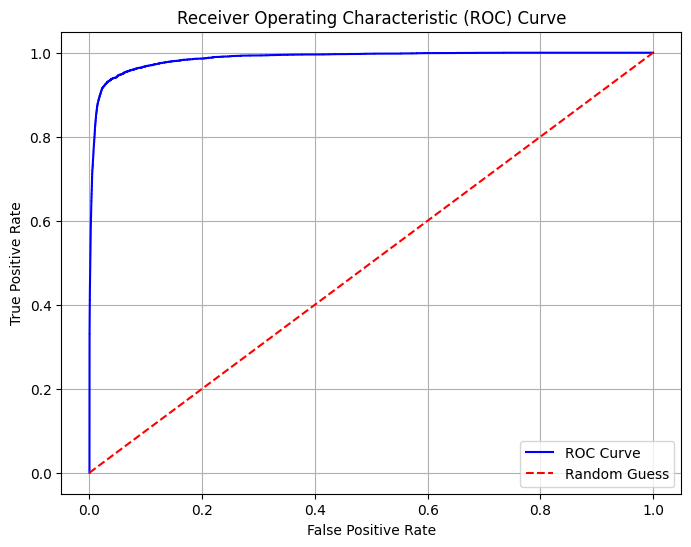

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [63]:
all_labels.shape

(5313, 141)

In [64]:
cl_report = multilabel_confusion_matrix(all_labels, all_predictions)
print("Classification report:")
print(len(cl_report))

Classification report:
141


In [65]:
print(cl_report[0])

[[4901   22]
 [ 293   97]]


In [66]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions, zero_division=np.nan)

In [67]:
all_predictions.sum(axis=0)

array([119.,  37.,  90., 169., 265.,  28., 198.,  89.,  83., 149.,  94.,
        96.,  50., 103.,  91., 149., 156., 200., 131., 141., 180., 111.,
        12.,  20., 141., 194.,  90.,  45.,  89.,  41., 109., 111., 113.,
       138., 201., 244., 244., 267., 254.,  24.,  19., 182.,  30., 216.,
        10., 122.,  21., 178.,   6.,  51.,  39.,   9.,   5.,  95.,   2.,
        56.,  52., 116.,  43.,  21.,  65.,  50.,  35.,  22.,  19.,  26.,
        52.,  64.,  24.,  10.,  12.,  96.,  48.,  53.,  32., 150., 127.,
       184., 188.,  63.,  59., 252.,  92.,  36.,  40.,  42.,  41.,  37.,
        95.,  43.,  53.,  97.,  33.,  38.,  48.,  46.,  53.,  47.,  43.,
        76.,  14., 100.,  51., 100.,  77.,  29.,  29.,  29.,  49.,  48.,
        65.,   3.,   5.,  45.,  35.,  34.,  37.,  50.,  51.,  46.,  45.,
        95., 150.,   5.,  46.,  65.,  49.,   2., 116.,  49., 118.,  40.,
        18.,  49.,  50.,  11.,   9.,   4.,  13.,   2.,   8.],
      dtype=float32)

In [68]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.25      0.38       390
           1       0.92      0.68      0.78        50
           2       0.54      0.80      0.65        61
           3       0.30      0.88      0.45        58
           4       0.61      0.85      0.71       190
           5       0.86      0.48      0.62        50
           6       0.38      0.71      0.50       105
           7       0.80      0.71      0.75       100
           8       0.42      0.70      0.53        50
           9       0.68      0.68      0.68       150
          10       0.50      0.73      0.59        64
          11       0.42      0.80      0.55        50
          12       0.88      0.88      0.88        50
          13       0.38      0.78      0.51        50
          14       0.53      0.96      0.68        50
          15       0.44      0.75      0.56        88
          16       0.38      0.80      0.52        75
          17       0.23    

In [ ]:
list(enc.classes_)[36]

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
num_classes = 83
# Compute precision, recall, and thresholds for each class
precision = dict()
recall = dict()
thresholds = dict()
average_precision = dict()

for i in range(num_classes):  # num_classes is the number of classes
    precision[i], recall[i], thresholds[i] = precision_recall_curve(all_labels[:, i], all_predictions[:, i])
    average_precision[i] = average_precision_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average precision-recall curve and AUC
precision["micro"], recall["micro"], _ = precision_recall_curve(all_labels.ravel(), all_predictions.ravel())
average_precision["micro"] = average_precision_score(all_labels, all_predictions, average="micro")

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_predictions[:, i])
    roc_auc[i] = roc_auc_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels.ravel(), all_predictions.ravel())
roc_auc["micro"] = roc_auc_score(all_labels, all_predictions, average="micro")

# Split classes into groups of 10
class_groups = [list(range(i, min(i + 10, num_classes))) for i in range(0, num_classes, 10)]

# Plot Precision-Recall and ROC curves for each group
for group in class_groups:
    plt.figure(figsize=(12, 6))

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 1)
    plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average Precision-Recall curve (AUPR = {0:0.2f})'
                 ''.format(average_precision["micro"]))
    for i in group:
        plt.step(recall[i], precision[i], where='post', label='Precision-recall curve of class {0} (AUPR = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve (Classes {})'.format(group))
    plt.legend(loc="best")

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr['micro'], tpr['micro'], label='Micro-average ROC curve (AUC = {0:0.2f})'
                 ''.format(roc_auc["micro"]))
    for i in group:
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Classes {})'.format(group))
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))